Prithul Sarker CS 687 HW 2 (Programming assignment)


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions
from matplotlib.pyplot import get_cmap

Number of total points:  256


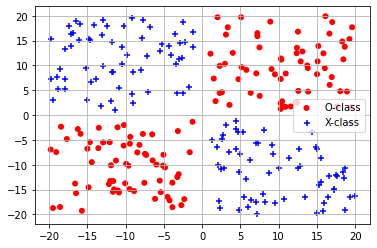

In [2]:
# Answer to the question no 4(a)
# Set up number of training examples
N = 250
N_each = int(np.ceil(np.sqrt(N/4)))  # For setting the range

# Set up upper and lower bound on input probabilites
Uh, Ul = 20, -1 # Upper and Lower Limit

# Setting up the O-class
O = np.concatenate((np.asarray([(random.uniform(-Ul, Uh), random.uniform(-Ul, Uh)) for x in range(N_each) for y in range(N_each)]), 
                    np.asarray([(random.uniform(-Uh, Ul), random.uniform(-Uh, Ul)) for x in range(N_each) for y in range(N_each)])))

# Setting up the X-class
X = np.concatenate((np.asarray([(random.uniform(-Ul, Uh), random.uniform(-Uh, Ul)) for x in range(N_each) for y in range(N_each)]), 
                    np.asarray([(random.uniform(-Uh, Ul), random.uniform(-Ul, Uh)) for x in range(N_each) for y in range(N_each)])))

print("Number of total points: ", len(X)+len(O))

# Plotting the X-class and O-class
plt.scatter(O[:,0], O[:,1], marker= 'o', c= 'red', edgecolors= 'none', label= 'O-class')
plt.scatter(X[:,0], X[:,1], marker= '+', c= 'blue', label= 'X-class')
plt.legend()
plt.grid(True)

In [3]:
# Answer to the question no 4(b)

# Setting up training examples
X_train = np.concatenate((X, O))

# Setting up labels
y_train = np.concatenate((np.asarray([(1, 0) for x in range(N_each*N_each*2)]), 
                          np.asarray([(0, 1) for x in range(N_each*N_each*2)])))

In [4]:
# Answer to the question no 4(c)

# Setting up model as sequential
model = Sequential()

# Setting up the input shape
model.add(tf.keras.Input(shape=(2,)))

# Adding first layer with 8 nodes and activation function as relu
model.add(Dense(8, activation='relu'))

# Adding second layer with activation function as sigmoid
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Answer to the question no 4(d)
# Setting up loss as binary cross entropy, optimizer as adam, and metrics as accuracy
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy'],
)

# Training your model
history = model.fit(X_train, y_train, batch_size= 10, epochs= 200, verbose= 1)

In [6]:
# Answer to the question no 4(e)
N_test = 300
N_test_each = int(np.ceil(np.sqrt(N_test/4)))
# Setting up the O-class
O_test = np.concatenate((np.asarray([(random.uniform(-Ul, Uh), random.uniform(-Ul, Uh)) for x in range(N_test_each) for y in range(N_test_each)]), 
                         np.asarray([(random.uniform(-Uh, Ul), random.uniform(-Uh, Ul)) for x in range(N_test_each) for y in range(N_test_each)])))

# Setting up the X-class
X_class_test = np.concatenate((np.asarray([(random.uniform(-Ul, Uh), random.uniform(-Uh, Ul)) for x in range(N_test_each) for y in range(N_test_each)]), 
                               np.asarray([(random.uniform(-Uh, Ul), random.uniform(-Ul, Uh)) for x in range(N_test_each) for y in range(N_test_each)])))

# Setting up training examples
X_test = np.concatenate((X_class_test, O_test))

print("Number of test points: ", len(X_test))

# Setting up labels
y_test = np.concatenate((np.asarray([(1, 0) for x in range(N_test_each*N_test_each*2)]), 
                         np.asarray([(0, 1) for x in range(N_test_each*N_test_each*2)])))


# Evaluating model
_, score = model.evaluate(X_test, y_test, verbose= 0)

print("Accuracy :", score)

# Model prediction
# np.round(model.predict(X_test))

Number of test points:  324
Accuracy : 1.0


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f51e210eb10>)

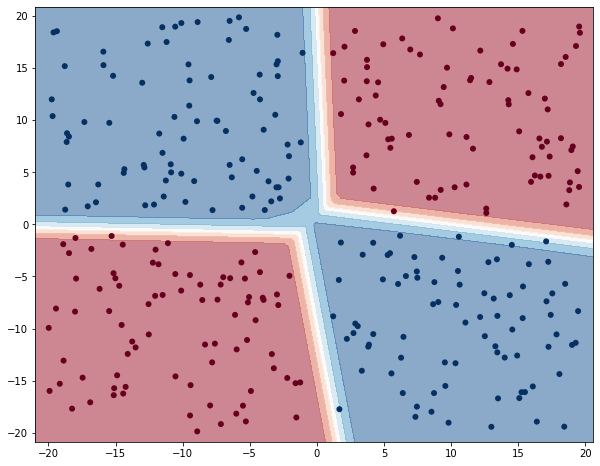

In [7]:
# Answer to the question no 4(h)

# Making the labels from two dimension to one dimension
# For (1, 0) = 1 and for (0, 1) = 0
def oneD_from_twoD(y):
  y_oned = []
  for i in range(len(y)):
    if y[i, 0] == 1:
      y_oned.append(1)
    else: y_oned.append(0)
  return(np.asarray(y_oned))

y_test_oned = oneD_from_twoD(y_test)
y_train_oned = oneD_from_twoD(y_train)

# Setting up he model for one dimensional output
model_2 = Sequential()
model_2.add(tf.keras.Input(shape=(2,)))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

print(model_2.summary())

# Setting up loss as binary cross entropy, optimizer as adam, and metrics as accuracy
model_2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy'],
)

# Training your model
model_2.fit(X_train, y_train_oned, batch_size= 10, epochs= 200, verbose= 1)

# Evaluating model
_, score = model_2.evaluate(X_test, y_test_oned, verbose= 0)

print("Accuracy :", score)

# Plotting decision boundary
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots(figsize = (10, 8))
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=0)

    return fig, ax
plot_decision_boundary(X_test, y_test_oned, model_2, cmap = 'RdBu')

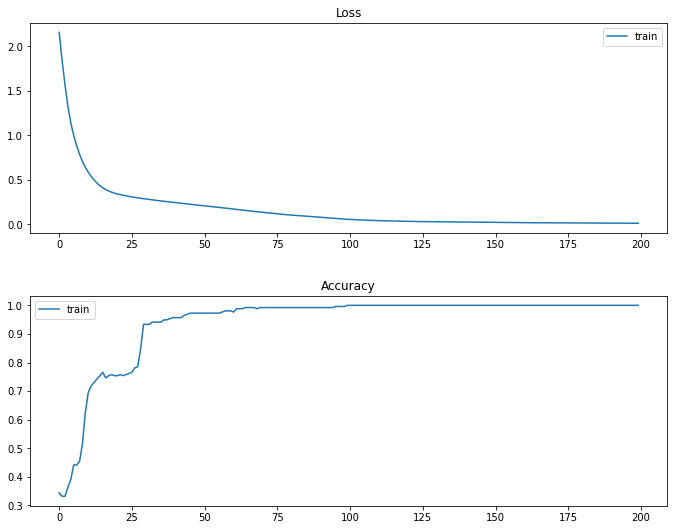

In [8]:
# 4(g) Changing parameters and plotting graphs

figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 8))

plt.subplot(211)
plt.title("Loss")
plt.plot(history.history['loss'], label = 'train')
# For validation loss (split)
# plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

plt.subplot(212)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
# For validation accuracy (split)
# plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()

figure.tight_layout(pad=3.0)
plt.show()